# Linear Regression 
The database of common fish in the market is a good example of problem that is solvable by linear regression. In this example, the objective is to predict the weight of the fish based on length, height, and width.

### Dataset
The dataset can be found here: https://www.kaggle.com/aungpyaeap/fish-market.
The file `File.csv` is in `data` folder. 

In this tutorial, we will use the following python libraries for machine learning.

### Numpy
Please refer to `numpy` tutorial on this site.

### Pandas
Pandas is a python library intended for processing tabular data like spreadsheet and csv files.

### Seaborn and Matplotlib
In machine learning, it is very important to visualize how data are processed by algorithms. Seaborn and Matplotlib are indispensible libraries to help us generate intuitive and informative plots.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading
Let's us load the data in a `pandas` data frame and show 10 randomly chosen points.

In [2]:
# load the csv file in data frame
data = pd.read_csv('data/Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
26,Bream,720.0,32.0,35.0,40.6,16.3618,6.0900
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
117,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
19,Bream,650.0,31.0,33.5,38.7,14.4738,5.7276
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
18,Bream,610.0,30.9,33.5,38.6,15.6330,5.1338
89,Perch,135.0,20.0,22.0,23.5,5.8750,3.5250


The columns are: Fish Species, Weight, Length1, Length2, Length3, Height, and Width. 
Let us print the count per species.

In [3]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


Let us use seaborn to create a nice bar graph to show simple data statistics.

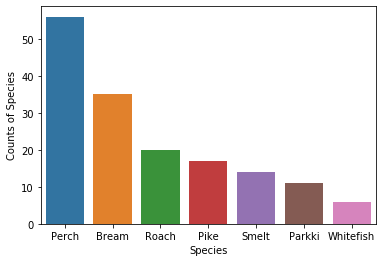

In [4]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

### Data Correlation
Let us see how the data are correleted with one another using tabular and graphical means.

In [5]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


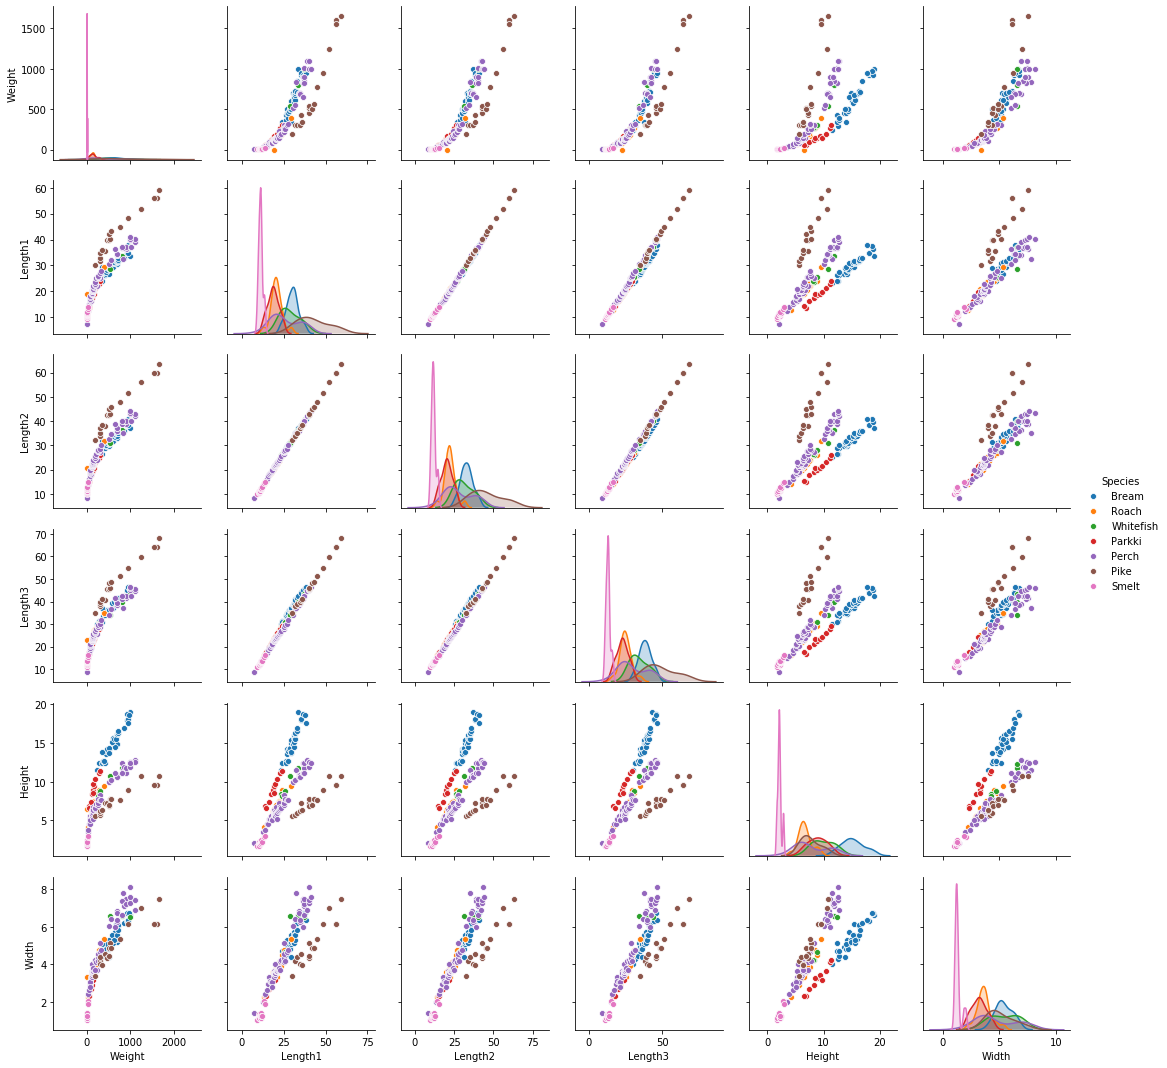

In [6]:
g = sns.pairplot(df, kind='scatter', hue='Species');

### Basic Data Statistics
Let's plot some data statistics.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


### Linear Regression
We will demonstrate linear regression using 2 methods:

1) `sklearn` - a python library immplementing many machine learning algorithms such as regression, classification, clustering, SVM, etc.

2) Linear Algrebra - as discussed in classed using Moore-Penrose pseudo inverse

Our `y` or output variable is weight. We want to predict the fish weight based on measureable physical features such as lengths, width and height.

In [8]:
# Output tensor
y = df['Weight']
# Input tensor
X = df.iloc[:,2:7]

#### Train and Test Splits
Create the train and test splits. 80% train, 20% test.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
print(X_train.shape)

(127, 5)


In [11]:
print(y_train.shape)

(127,)


### Linear Regression Using `sklearn.linear_model.LinearRegression`

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -484.8536494736824
Model coefficients:  [ 56.90591757  -4.63465655 -28.54481968  24.25584123  43.68347751]


Let's compute the prediction on train split and measure its R2.

R2 or coefficient of determination is simply is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [14]:
y_head = reg.predict(X_train)
r2_score(y_train, y_head)

0.8861940780217027

Cross Validation - an alternative method in measuring the performance of a model is by splitting the train data into `n` equal sizes. In the 1st iteration, the 1st split is the validation split and the 2nd to `n-th` splits are the train split. The same method is repeated for the 2nd iteration (being validation) and 1st, 3rd-`n-th` as train split. This is done repeatedly til the `n-th` split. 

Below is the performance of linear regression for 10 splits.

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.78097703 0.86340773 0.90313506 0.94893488 0.93842745 0.85176837
 0.91632035 0.85490536 0.8073436  0.81653965]


In [16]:
cross_val_score_train.mean()

0.868175950058243

#### Validation on Test Split
The *real* validation happens on the test split. Most of the time, this score is the one that is reported.

In [17]:
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.8704220588719106


Let's plot the predictions. We will plot the output vs one of the input variables.

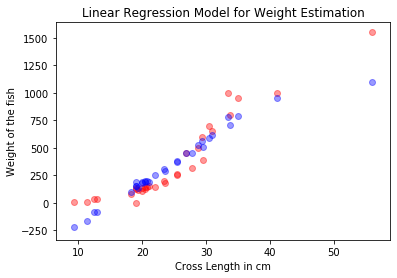

In [18]:
plt.scatter(X_test['Length1'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length1'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

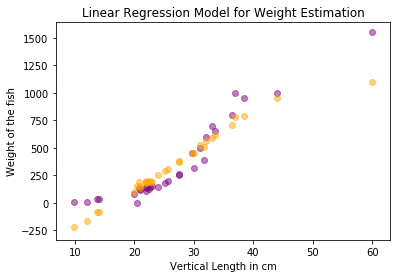

In [19]:
plt.scatter(X_test['Length2'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['Length2'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

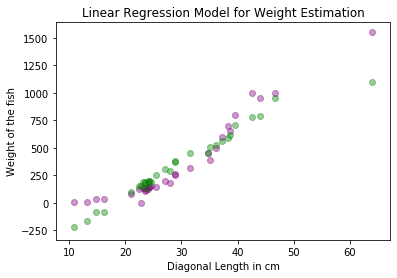

In [20]:
plt.scatter(X_test['Length3'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['Length3'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

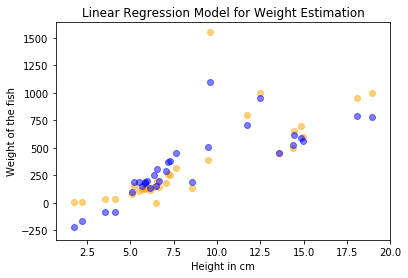

In [21]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

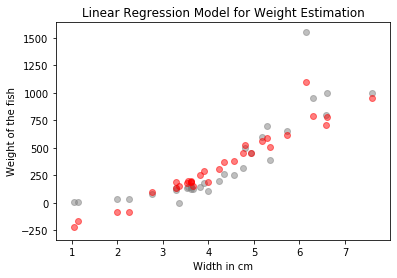

In [22]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

### Linear Regression using Moore-Penrose Pseudo Inverse
Linear Regression using this requires us to solve: 

\begin{equation*}
\mathbf{x} = (A^TA)^{-1}A^T\mathbf{b}
\end{equation*}

In this case: `A = X_train` and `b = y_train`

In [23]:
Xt = np.array(X_train.T)
print(Xt.shape)

(5, 127)


In [24]:
X = np.array(X_train)
print(X.shape)

(127, 5)


Let us compute the inverse

In [25]:
a = np.matmul(Xt,X)

In [26]:

X = np.linalg.inv(a)

In [27]:
X = np.matmul(np.matmul(X,Xt),y_train)

In [28]:
X

array([164.55936398, -69.63978497, -70.99155568,  41.90595377,
       -10.2262983 ])

Let's compare this with the coefficients obtained earlier.

In [29]:
print('Model coefficients: ', reg.coef_)

Model coefficients:  [ 56.90591757  -4.63465655 -28.54481968  24.25584123  43.68347751]


Let's now compute R2 and the new prediction based on test dataset

In [30]:
y_head = np.matmul(np.array(X_train),X)

In [31]:
r2_score(y_train, y_head)

0.6764215806603961

In [33]:
y_pred_pi = np.matmul(np.array(X_test),X)
r2_score(y_test, y_pred_pi)

0.6243923434211206

We can see that we obtained a lower R2.
The plots of weight vs an input are shown below

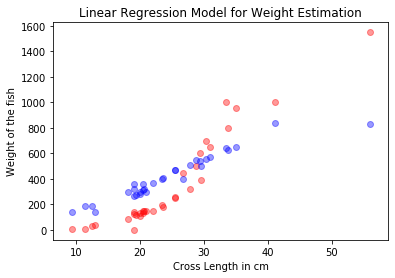

In [34]:
plt.scatter(X_test['Length1'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Length1'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

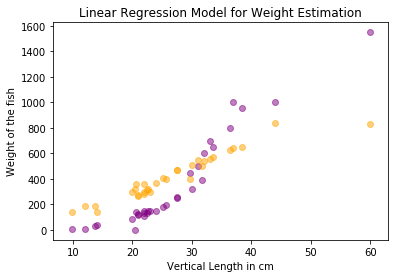

In [35]:
plt.scatter(X_test['Length2'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['Length2'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

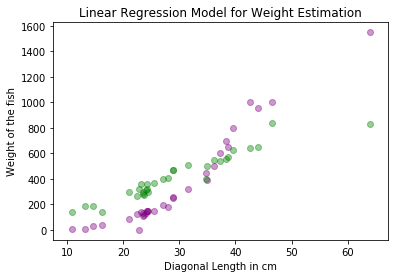

In [36]:
plt.scatter(X_test['Length3'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['Length3'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');